In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('Final_News_DF_Labeled_ExamDataset.csv')

In [3]:
print("Looking at the first five rows : ")
df.head()

Looking at the first five rows : 


,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(" data set dimensions : ", df.shape)

 data set dimensions :  (1493, 301)


In [5]:
X = df.drop('LABEL', axis=1).values
y = df['LABEL'].values

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
y

array(['politics', 'politics', 'politics', ..., 'science', 'science',
       'science'], dtype=object)

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
print("Looking at the target label values before and after encoding")
print("\n")
print(y, y_encoded)

Looking at the target label values before and after encoding


['politics' 'politics' 'politics' ... 'science' 'science' 'science'] [1 1 1 ... 2 2 2]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25)

In [11]:
print("Dimensions of training data set for columns and target label is : ", X_train.shape, y_train.shape)

Dimensions of training data set for columns and target label is :  (1119, 300) (1119,)


In [12]:
print("Dimensions of testing data set for columns and target label is : ", X_test.shape, y_test.shape)

Dimensions of testing data set for columns and target label is :  (374, 300) (374,)


## ANN model

In [14]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 48963 (191.26 KB)
Trainable params: 48963 (191.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 0s 554us/step - loss: 1.0179 - accuracy: 0.4745
Epoch 2/10
35/35 [==============================] - 0s 429us/step - loss: 0.7883 - accuracy: 0.7051
Epoch 3/10
35/35 [==============================] - 0s 465us/step - loss: 0.5389 - accuracy: 0.8195
Epoch 4/10
35/35 [==============================] - 0s 502us/step - loss: 0.3859 - accuracy: 0.8534
Epoch 5/10
35/35 [==============================] - 0s 473us/step - loss: 0.3007 - accuracy: 0.8856
Epoch 6/10
35/35 [==============================] - 0s 446us/step - loss: 0.2504 - accuracy: 0.9053
Epoch 7/10
35/35 [==============================] - 0s 460us/step - loss: 0.1964 - accuracy: 0.9214
Epoch 8/10
35/35 [==============================] - 0s 504us/step - loss: 0.1678 - accuracy: 0.9294
Epoch 9/10
35/35 [==============================] - 0s 481us/step - loss: 0.1519 - accuracy: 0.9276
Epoch 10/10
35/35 [==============================] - 0s 480us/step - loss: 0.1350 - accuracy: 0.9419

In [17]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 453us/step - loss: 0.9945 - accuracy: 0.7273


[0.9944659471511841, 0.7272727489471436]

In [18]:
print("Accuracy on testing data using ANN model is : ", model.evaluate(X_test, y_test)[1])

12/12 [==============================] - 0s 785us/step - loss: 0.9945 - accuracy: 0.7273
Accuracy on testing data using ANN model is :  0.7272727489471436


In [19]:
from sklearn.metrics import confusion_matrix

12/12 [==============================] - 0s 649us/step


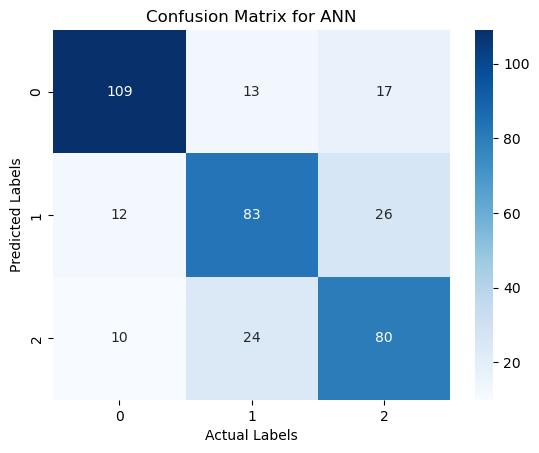

In [21]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ANN')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

## CNN model

In [23]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 298, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 149, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 147, 64)           24640     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 73, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 4672)              0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [25]:
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 0s 6ms/step - loss: 0.9185 - accuracy: 0.5532
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.7087
Epoch 3/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5487 - accuracy: 0.7739
Epoch 4/10
35/35 [==============================] - 0s 6ms/step - loss: 0.4789 - accuracy: 0.8070
Epoch 5/10
35/35 [==============================] - 0s 6ms/step - loss: 0.4150 - accuracy: 0.8320
Epoch 6/10
35/35 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8517
Epoch 7/10
35/35 [==============================] - 0s 6ms/step - loss: 0.3083 - accuracy: 0.8704
Epoch 8/10
35/35 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.8874
Epoch 9/10
35/35 [==============================] - 0s 6ms/step - loss: 0.2215 - accuracy: 0.9035
Epoch 10/10
35/35 [==============================] - 0s 6ms/step - loss: 0.1947 - accuracy: 0.9142


In [26]:
print("Accuracy on testing data using CNN model is : ", model.evaluate(X_test, y_test)[1])

12/12 [==============================] - 0s 2ms/step - loss: 1.0816 - accuracy: 0.7059
Accuracy on testing data using CNN model is :  0.7058823704719543


12/12 [==============================] - 0s 2ms/step


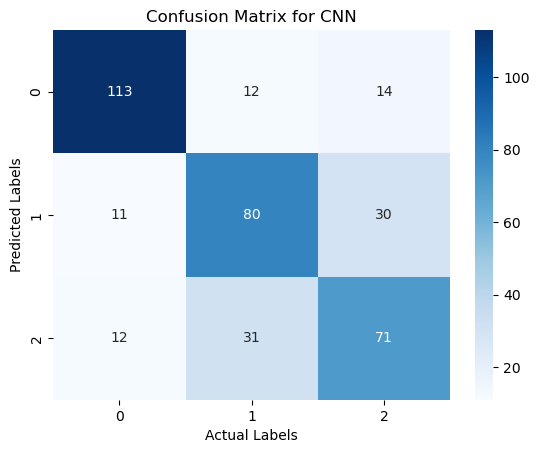

In [27]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CNN')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

## LSTM

In [29]:
model = Sequential()
model.add(LSTM(128, activation='tanh', input_shape=(X_train.shape[1], 1) ))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 75011 (293.01 KB)
Trainable params: 75011 (293.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 4s 91ms/step - loss: 1.0965 - accuracy: 0.3566
Epoch 2/10
35/35 [==============================] - 3s 92ms/step - loss: 1.0903 - accuracy: 0.3673
Epoch 3/10
35/35 [==============================] - 3s 94ms/step - loss: 1.0579 - accuracy: 0.4692
Epoch 4/10
35/35 [==============================] - 3s 95ms/step - loss: 1.0422 - accuracy: 0.4853
Epoch 5/10
35/35 [==============================] - 3s 92ms/step - loss: 1.0327 - accuracy: 0.4718
Epoch 6/10
35/35 [==============================] - 3s 92ms/step - loss: 1.0306 - accuracy: 0.4817
Epoch 7/10
35/35 [==============================] - 3s 95ms/step - loss: 1.0269 - accuracy: 0.4817
Epoch 8/10
35/35 [==============================] - 3s 94ms/step - loss: 1.0140 - accuracy: 0.4915
Epoch 9/10
35/35 [==============================] - 3s 93ms/step - loss: 1.0338 - accuracy: 0.4665
Epoch 10/10
35/35 [==============================] - 3s 92ms/step - loss: 1.0065 - accuracy: 0.4861


In [32]:
print("Accuracy on testing data using LSTM model is : ", model.evaluate(X_test, y_test)[1])

12/12 [==============================] - 1s 34ms/step - loss: 1.0262 - accuracy: 0.4679
Accuracy on testing data using LSTM model is :  0.4679144322872162


12/12 [==============================] - 1s 33ms/step


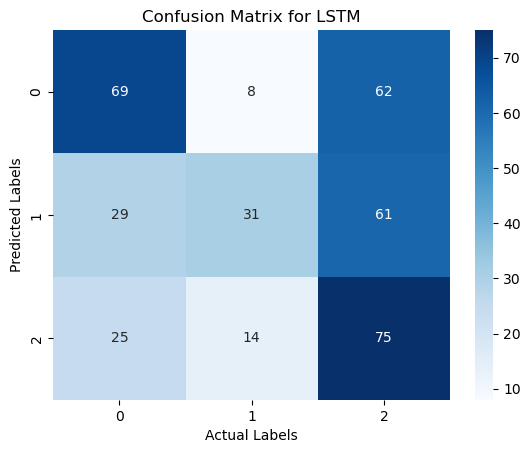

In [33]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()